Build a regression model.

First Model Without Additional Predictors

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.123
Date:                Fri, 18 Apr 2025   Prob (F-statistic):              0.290
Time:                        11:59:12   Log-Likelihood:                -1748.4
No. Observations:                 514   AIC:                             3501.
Df Residuals:                     512   BIC:                             3509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.4124      0.955  

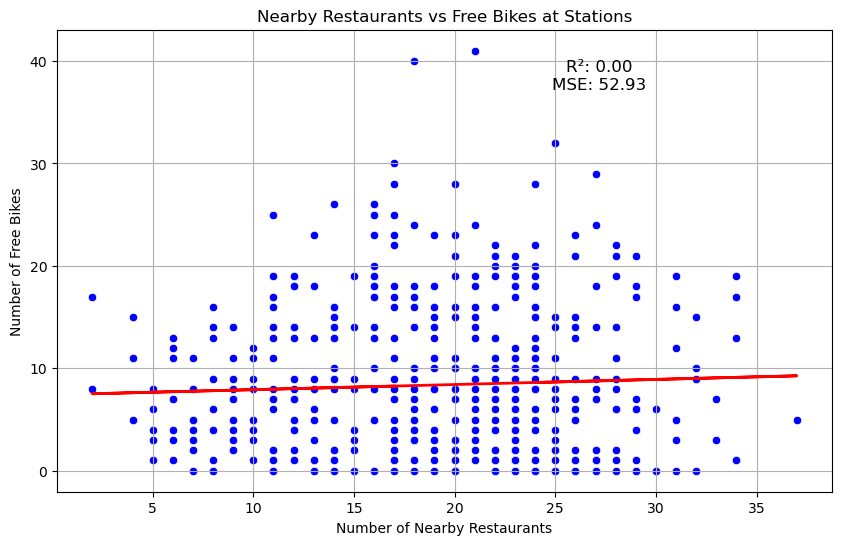

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df_merged = pd.read_csv("merged.csv")

restaurant_keywords = ['restaurant', 'tapas', 'bar', 'cafeteria', 'cafe']
restaurant_df = df_merged[df_merged['category'].str.lower().str.contains('|'.join(restaurant_keywords), na=False)]

restaurant_counts = restaurant_df.groupby('station_name').size().reset_index(name='restaurant_count')

bike_availability = df_merged[['station_name', 'free_bikes']].drop_duplicates(subset='station_name')

restaurant_bike_df = pd.merge(restaurant_counts, bike_availability, on='station_name')

X = restaurant_bike_df[['restaurant_count']]  
X = sm.add_constant(X)  
y = restaurant_bike_df['free_bikes']         

model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

print(model.summary())  

plt.figure(figsize=(10, 6))
sns.scatterplot(data=restaurant_bike_df, x='restaurant_count', y='free_bikes', color='blue')
plt.plot(restaurant_bike_df['restaurant_count'], y_pred, color='red', linewidth=2) 
plt.title('Nearby Restaurants vs Free Bikes at Stations')
plt.xlabel('Number of Nearby Restaurants')
plt.ylabel('Number of Free Bikes')
plt.grid(True)

plt.text(0.7, 0.9, f'R²: {model.rsquared:.2f}\nMSE: {model.mse_resid:.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


Second Model: Multiple Linear Regression with Additional Predictors

In [ ]:
import pandas as pd
import statsmodels.api as sm


restaurant_counts = df_merged['category'] == 'Restaurant'] \
    .groupby('station_name').size().reset_index(name='restaurant_count')

avg_distance = df_merged[df_merged['category'] == 'Restaurant'] \
    .groupby('station_name')['distance'].mean().reset_index(name='avg_restaurant_distance')

bike_availability = df_merged.groupby(['station_name', 'station_longitude']).agg({
    'free_bikes': 'mean'
}).reset_index()

regression_df = pd.merge(bike_availability, restaurant_counts, on='station_name', how='left')
regression_df = pd.merge(regression_df, avg_distance, on='station_name', how='left')

regression_df['restaurant_count'] = regression_df['restaurant_count'].fillna(0)
regression_df['avg_restaurant_distance'] = regression_df['avg_restaurant_distance'].fillna(
    regression_df['avg_restaurant_distance'].max()
)

regression_df['interaction'] = (
    regression_df['restaurant_count'] * regression_df['avg_restaurant_distance']
)

X = regression_df[['restaurant_count', 'avg_restaurant_distance', 'station_longitude', 'interaction']]
X = sm.add_constant(X)
y = regression_df['free_bikes']

model = sm.OLS(y, X).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.881
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           0.000719
Time:                        14:10:57   Log-Likelihood:                -1742.3
No. Observations:                 515   AIC:                             3495.
Df Residuals:                     510   BIC:                             3516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

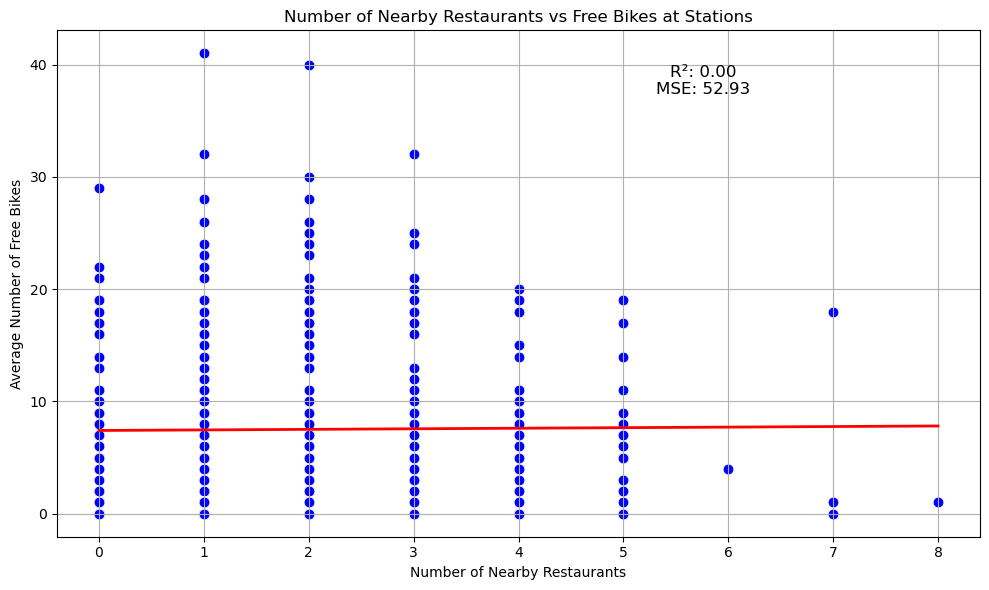

In [35]:

X_sorted = sorted_df[['restaurant_count', 'avg_restaurant_distance', 'station_longitude', 'interaction']]
X_sorted = sm.add_constant(X_sorted, has_constant='add') 

X_sorted = X_sorted[model.model.exog_names]

y_pred_sorted = model.predict(X_sorted)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_df, x='restaurant_count', y='free_bikes', color='blue', s=60)
plt.plot(sorted_df['restaurant_count'], y_pred_sorted, color='red', linewidth=2)

plt.title('Number of Nearby Restaurants vs Free Bikes at Stations')
plt.xlabel('Number of Nearby Restaurants')
plt.ylabel('Average Number of Free Bikes')
plt.grid(True)

plt.text(0.7, 0.9, f'R²: {model.rsquared:.2f}\nMSE: {model.mse_resid:.2f}',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()



Third Model: Standardized Linear Regression (Addressing Stong Multicollinearity)

In [45]:
X = regression_df[['restaurant_count', 'avg_restaurant_distance', 'station_longitude', 'interaction']]
y = regression_df['free_bikes']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.881
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           0.000719
Time:                        14:51:27   Log-Likelihood:                -1742.3
No. Observations:                 515   AIC:                             3495.
Df Residuals:                     510   BIC:                             3516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3573      0.316     26.472      0.0

Provide model output and an interpretation of the results. 

The linear regression model produced an R-squared value of 0.037, indicating that approximately 3.7% of the variance in the number of free bikes can be explained by the predictors included. While this reflects a relatively weak model fit, the overall model was statistically significant (F(4, 510) = 4.881, p = 0.0007), suggesting that at least one predictor contributes meaningfully to explaining bike availability.

Examining the standardized coefficients provides a clearer view of the relative influence of each predictor. The number of nearby restaurants showed a significant negative relationship with free bike availability (β = -3.34, p = 0.015), implying that stations in areas with more restaurants tend to have fewer available bikes—possibly due to higher demand in these busy areas. Similarly, the average distance to restaurants had a small but significant negative effect (β = -1.12, p = 0.025), suggesting that stations located farther from restaurants may also have fewer bikes, potentially reflecting reduced demand or accessibility in those locations.

The longitude of the station had a significant positive coefficient (β = 1.05, p = 0.001), indicating that stations situated farther east tend to have more bikes available. This may point to geographic variation in bike usage or supply patterns across the city.

The interaction between restaurant count and distance was also significant (β = 2.65, p = 0.041), suggesting that the combined effect of these two variables may have a stronger influence on bike availability than either one alone. This interaction could indicate that restaurant density has a different effect depending on proximity, possibly indicating areas where demand intensifies due to both high restaurant concentration and central location.

While the model explains only a small portion of the variation in free bike availability, it offers some insight into how urban features may affect bike demand. However, the earlier version of the model showed signs of multicollinearity, as indicated by a high condition number, which could make coefficient estimates less stable. Future work could benefit from incorporating additional predictors (e.g., time of day, weather, station capacity), using feature selection techniques, or applying alternative modeling approaches such as regularization to improve model reliability and explanatory power.



# Stretch

How can you turn the regression model into a classification model?

 I’d start by thinking about the actual goal behind the analysis. Right now, I'm predicting the exact number of free bikes at a station based on nearby restaurant data and location, but in a real-world scenario, that level of precision might not be necessary or useful. People usually just want to know whether bikes will be available or not, rather than the exact number. So reframing this as a classification task could actually be more aligned with how this data would be used.

To do this, I’d first create categories from the continuous free_bikes variable. I could split the data into two classes: “low availability” and “high availability,” and could use the median number of free bikes as the threshold. Another approach would be to define three categories: “no bikes,” “few bikes,” and “many bikes.” The exact bins would depend on the distribution of the data and what makes the most sense practically (e.g., is zero availability common?).

Once the target is categorized, I’d keep the same predictors we used in the regression model—restaurant count, average distance to restaurants, station longitude, and the interaction term—but I’d feed them into a classification model instead, such as logistic regression or a decision tree. These models would let us see how these features relate to the likelihood of a station falling into one availability category versus another.

However, there could be trade-offs. Classification simplifies the problem, but that also means we lose some of the nuance that comes with predicting actual bike counts. There’s also the challenge of making sure the categories are not too imbalanced—if most stations fall into one class, the model might just learn to predict that class every time. So, I’d also spend some time evaluating performance with metrics like precision, recall, or the F1 score, especially if the goal is to reduce missed opportunities for riders (e.g., falsely predicting high availability when there are no bikes). It would be very important to define the categories carefully and make sure the model still performs well in terms of practical decision-making.